## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [65]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [66]:
import os
import keras
# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ''

In [67]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [68]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x=(x/255-0.5)*2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y,num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [69]:

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [70]:
x_train

array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       ...,
       [-0.7254902 ,  0.39607843,  0.84313725, ..., -0.90588235,
        -0.75686275, -0.60784314],
       [ 0.48235294,  0.65490196,  0.88235294, ...,  0.52941176,
         0.49019608,  0.34117647],
       [ 0.79607843,  0.79607843,  0.8745098 , ...,  0.27843137,
         0.27843137,  0.2627451 ]])

In [71]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,256,256,256,256,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               65792     
__________

In [72]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [73]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [74]:
import time
startTime = time.time()
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
takeTimes = time.time() - startTime
print("Time:",takeTimes)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.7358 - acc: 0.3750 - val_loss: 1.5670 - val_acc: 0.4407
Epoch 2/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.5003 - acc: 0.4707 - val_loss: 1.4447 - val_acc: 0.4879
Epoch 3/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.3765 - acc: 0.5114 - val_loss: 1.4025 - val_acc: 0.5024
Epoch 4/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.2767 - acc: 0.5471 - val_loss: 1.3890 - val_acc: 0.5117
Epoch 5/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.1946 - acc: 0.5759 - val_loss: 1.3889 - val_acc: 0.5253
Epoch 6/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.1170 - acc: 0.6024 - val_loss: 1.3646 - val_acc: 0.5308
Epoch 7/100
50000/50000 [==============================] - 4s 87us/step - loss: 1.0397 - acc: 0.6311 - val_loss: 1.3910 -

50000/50000 [==============================] - 4s 85us/step - loss: 0.0981 - acc: 0.9677 - val_loss: 3.1025 - val_acc: 0.5305
Epoch 60/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1167 - acc: 0.9632 - val_loss: 3.0270 - val_acc: 0.5313
Epoch 61/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.0968 - acc: 0.9683 - val_loss: 3.0906 - val_acc: 0.5335
Epoch 62/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.1001 - acc: 0.9672 - val_loss: 3.0503 - val_acc: 0.5377
Epoch 63/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.0923 - acc: 0.9702 - val_loss: 3.0205 - val_acc: 0.5282
Epoch 64/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.0875 - acc: 0.9723 - val_loss: 3.2940 - val_acc: 0.5333
Epoch 65/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.0907 - acc: 0.9708 - val_loss: 3.0323 - val_acc: 0.5322
Epoch 66/100
50000/50000 [==============

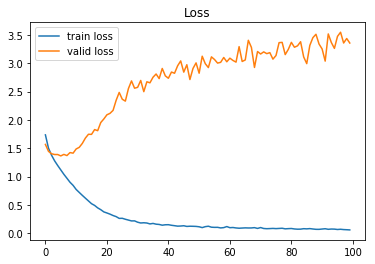

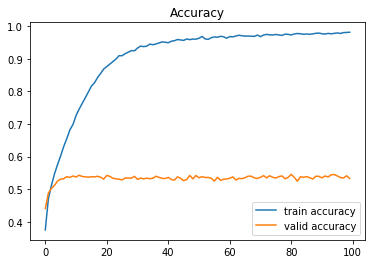

In [75]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()